<a href="https://colab.research.google.com/github/varshitha0230/ORES-5160-02/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysis of US demographic under alcohol consumption related risk

In this project, I will analyze which risk categories are more prevalent in alcohol-related deaths. I will then categorize U.S. demographic groups into these risk categories so that for each category of risk factor and cause of death, the proportion of U.S. citizens at risk can be approximated.

# Data sources
The data for this project has been downloaded from two different sources that provide the data in different formats. Alcohol consumption related death data in the U.S. between 2015 and 2019 comes from the HealthData.gov website's "Alcohol-Related Disease Impact (ARDI) Application - Years of Potential Life Lost" dataset. The U.S. demographic data comes from the NHANES website in SAS format. I have used different functions from the Pandas library to load and parse these files.
The specific data sources are:
Alcohol-Related Disease Impact (ARDI) Application - Years of Potential Life Lost dataset from HealthData.gov (https://healthdata.gov/dataset/Alcohol-Related-Disease-Impact-ARDI-Application-Ye/kk5w-3cx3/about_data)
2017-2018 Demographics Data - Continuous NHANES in SAS format from the NHANES website (https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.XPT)

# Methods

# - Loading the necessary libraries
- Loading data from multiple website
- Parsing different data format
- Selecting demographic and death count data from alcohol consumption data file.
- Selecting similar demographic columns from US demographic data.
- Making grouped summary tables of the deaths and dempgraphy
- Pivot tables and data aggregations and plots to get more indeapth idea about data set and problem statement
- Join the demographic data nd the grouped summary table of ALcohol consumption data.
- Write function to take input from the user about demography of interest and category of interest.
- Then function selects the required data and prints the summary table containing that demography, category, cause of death and proportion of that demography under risk.

Lets load the necessary libraries

In [44]:
# required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Alcohol related deaths in US between 2015-2019
Lets load the alcohol related death data

In [45]:
# alcohol related deaths
alcohol_deaths = pd.read_csv('https://data.cdc.gov/api/views/jkcv-z5vp/rows.csv')
alcohol_deaths.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,ConditionType,Category,Cause_of_Death,Data_Value_Unit,Data_Value_Type,...,ConditionTypeID,CategoryID,Cause_of_Death_ID,EffectID,ConsumptionID,SexID,AgeCategoryID,AgeGroupID,DataValueUnitID,DataValueTypeID
0,2015,2019,US,United States,ARDI,Acute,Alcohol-Related Poisonings,Alcohol poisoning,Years of Potential Life Lost,5 years average,...,ACUTE,CAT6,ALCPOI,HARMEFF,EXCSVE,GENM,UN21,Age21,YPLL,5YEARSAVG
1,2015,2019,US,United States,ARDI,Acute,Alcohol-Related Poisonings,Alcohol poisoning,Years of Potential Life Lost,5 years average,...,ACUTE,CAT6,ALCPOI,HARMEFF,EXCSVE,GENALL,OTH,Age1,YPLL,5YEARSAVG
2,2015,2019,US,United States,ARDI,Acute,Alcohol-Related Poisonings,Alcohol poisoning,Years of Potential Life Lost,5 years average,...,ACUTE,CAT6,ALCPOI,HARMEFF,EXCSVE,GENALL,OTH,Age2,YPLL,5YEARSAVG


Lets check the variable information

In [46]:
# variable data types
print(alcohol_deaths.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62504 entries, 0 to 62503
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   62504 non-null  int64  
 1   YearEnd                     62504 non-null  int64  
 2   LocationAbbr                62504 non-null  object 
 3   LocationDesc                62504 non-null  object 
 4   DataSource                  62504 non-null  object 
 5   ConditionType               62504 non-null  object 
 6   Category                    62504 non-null  object 
 7   Cause_of_Death              62504 non-null  object 
 8   Data_Value_Unit             62504 non-null  object 
 9   Data_Value_Type             62504 non-null  object 
 10  Data_Value                  62504 non-null  int64  
 11  Data_Value_Alt              62504 non-null  int64  
 12  Data_Value_Footnote_Symbol  0 non-null      float64
 13  Data_Value_Footnote         0 n

From the output shown, we can see that the "Sex" column is stored as object data type. The "AgeGroup" column is also stored as object data type. Additionally, the "Sex" column data is in object format and the "Data_value" column contains integer formatted data, as expected.

# Data dictionary

Variable description are as follows:-

- YearStart: The starting year for the data point.
- YearEnd: The ending year for the data point.

- LocationAbbr: Abbreviation for the location (e.g., US, CA).
- LocationDesc: Description of the location (e.g., United States, California).

- DataSource: The source of the data used for the calculation.

- ConditionType: The type of condition being studied (e.g., acute, chronic).
- Category: The broader category of the condition (e.g., liver disease, cancer).
- Cause_of_Death: The specific cause of death attributed to alcohol.

- Data_Value_Unit: The unit of the data value (e.g., years, deaths).
- Data_Value_Type: The type of data value (e.g., count, rate).
- Data_Value: The actual numerical value of the data point.
- Data_Value_Alt: Alternate representation of the data value (e.g., percentage).
- Data_Value_Footnote_Symbol: Symbol used for a footnote associated with the data value.
- Data_Value_Footnote: Explanation of the footnote symbol.

- Effect: The effect of alcohol on the condition (e.g., increased risk, decreased risk).
Consumption Pattern Variable:

- ConsumptionPattern: The pattern of alcohol consumption (e.g., Excessive Alcohol Use, Any Alcohol Use).

- Sex: The sex of the individual (e.g., male, female).
AgeCategory: The age category of the individual (e.g., 20-29, 30-39).
- AgeGroup: The specific age group of the individual (e.g., 25-29).

Lets filter out the variable of interest

In [47]:
# selecting the variables of interest
cols_sel = ['Category', 'Cause_of_Death','ConsumptionPattern','Sex','AgeGroup', 'Data_Value']
alcohol_deaths_sel = alcohol_deaths[cols_sel]
alcohol_deaths_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62504 entries, 0 to 62503
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Category            62504 non-null  object
 1   Cause_of_Death      62504 non-null  object
 2   ConsumptionPattern  62504 non-null  object
 3   Sex                 62504 non-null  object
 4   AgeGroup            62504 non-null  object
 5   Data_Value          62504 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.9+ MB


Lets print the head of the selected columns

In [48]:
# head of the reduced dataset with selected column of interest
alcohol_deaths_sel.head(3)

,Category,Cause_of_Death,ConsumptionPattern,Sex,AgeGroup,Data_Value
0,Alcohol-Related Poisonings,Alcohol poisoning,Excessive Alcohol Use,Male,Under 21,1760
1,Alcohol-Related Poisonings,Alcohol poisoning,Excessive Alcohol Use,Overall,0-19,1783
2,Alcohol-Related Poisonings,Alcohol poisoning,Excessive Alcohol Use,Overall,20-34,19271


Let us define a function to check the proportion of unique values in a Pandas Series object.

In [49]:
# function to check the proportion of categories for a given categorical variable.
# I am defining it to check the proportion of each categories for the categorical variable
# in the alcohol related data in US

def get_prop(df, col):
    """(pd.dataframe, str)->pd.dataframe
    This function takes a dataframe and a column name. Then it prints the
    proportion of unique values in that column.

    >>> p = pd.DataFrame({'var1':['A','B','C','A','B','A']})

    >>> get_prop(p,'var1')
        var1  Proportion
    0    A    0.500000
    1    B    0.333333
    2    C    0.166667
    """
    prop = df[col].value_counts(normalize=True).reset_index()
    prop.columns = [col, 'Proportion']
    return prop

In [50]:
# testing the get_prop function using doctest
import doctest
doctest.run_docstring_examples(get_prop, globals(), verbose=True, optionflags=doctest.NORMALIZE_WHITESPACE)

Finding tests in NoName
Trying:
    p = pd.DataFrame({'var1':['A','B','C','A','B','A']})
Expecting nothing
ok
Trying:
    get_prop(p,'var1')
Expecting:
        var1  Proportion
    0    A    0.500000
    1    B    0.333333
    2    C    0.166667
ok


The function passes the doctest. Lets proceed with the exploration of the proportions of categories in each of the categorical variables

## Categorical proportions

Lets get the unique values in each of the categories

In [51]:
# unique value proportion in category
get_prop(alcohol_deaths_sel,'Category')

,Category,Proportion
0,Other Acute Causes,0.205491
1,100% Alcohol-Attributable,0.205491
2,Cancer,0.142263
3,"Liver, Gallbladder, and Pancreas",0.126456
4,Other Chronic Causes,0.094842
5,Heart Disease and Stroke,0.092346
6,Total,0.047421
7,Alcohol-Related Poisonings,0.031614
8,Suicide,0.031614
9,Motor Vehicle Traffic Crashes,0.015807


- The "category" column contains the cause of death related to alcohol consumption.
- It also contains a "Total" category which aggregates information across all of the categories. We may remove the "Total" category later to only analyze the individual categories separately for further analysis.

I will remove the "Total" categories after checking similar aggregated analysis for all other categorical variables in the selected data.

Lets check the proportion of categories for **Cause of Death**. It is more detailed description of cause of death which is related to alcohol consumpion.

In [52]:
# unique value proportion in Cause_of_Death
get_prop(alcohol_deaths_sel,'Cause_of_Death').head()

,Cause_of_Death,Proportion
0,Total for All Causes,0.047421
1,Gallbladder disease,0.031614
2,"Stroke, ischemic",0.022463
3,Coronary heart disease,0.022463
4,Hypertension,0.022463


Now lets check the proportion of categories of consumption pattern

In [53]:
# unique value proportion in ConsumptionPattern
df_cons=get_prop(alcohol_deaths_sel,'ConsumptionPattern')
df_cons

,ConsumptionPattern,Proportion
0,Excessive Alcohol Use,0.567388
1,Any Alcohol Use,0.432612


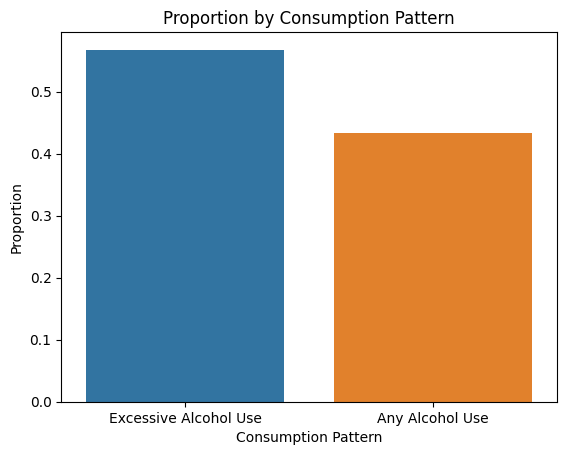

In [54]:
# bar plot of the age group demographic
sns.barplot(x='ConsumptionPattern', y='Proportion', data=df_cons)
plt.title('Proportion by Consumption Pattern')
plt.xlabel('Consumption Pattern')
plt.ylabel('Proportion')
plt.show()

0.56 of the cases are related to excessive use of alcohol and 0.432 cases are related to any alcohol use.

Similarly lets check the categorical proportions in Agegroup

In [55]:
# unique value proportion in AgeCategory
get_prop(alcohol_deaths_sel,'AgeGroup')

,AgeGroup,Proportion
0,Overall,0.324459
1,Under 21,0.147255
2,0-19,0.105657
3,20-34,0.105657
4,50-64,0.105657
5,65+,0.105657
6,35-49,0.105657


- Lets remove the death incidence where age is overll and Under 21. So that age group could be non coinciding
- Also for the same reason lets remove the overall sex category and lets only keep the female and male category.

In [56]:
# removing death incident where Age is overall or under 21
alcohol_deaths_age = alcohol_deaths_sel[(alcohol_deaths_sel['AgeGroup'] != 'Under 21') & (alcohol_deaths_sel['AgeGroup'] != 'Overall') & (alcohol_deaths_sel['Category'] !='Total')]

# removing the overall category from sex category
alcohol_deaths_sex = alcohol_deaths_sel[(alcohol_deaths_sel['Sex'] != 'Overall') & (alcohol_deaths_sel['Category'] !='Total')]

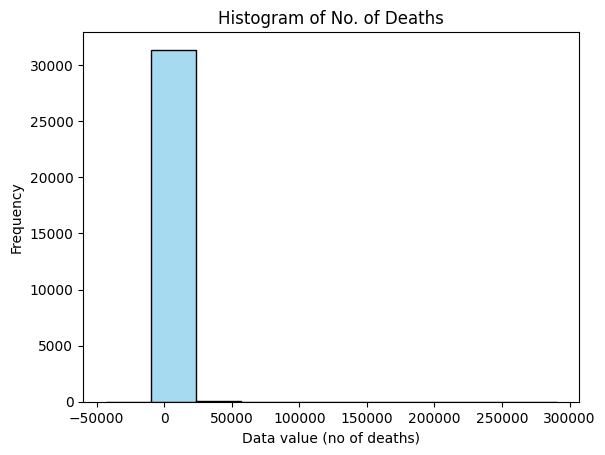

In [57]:
# histogram of data values
sns.histplot(alcohol_deaths_age['Data_Value'], bins=10, kde=False, color='skyblue')
plt.title('Histogram of No. of Deaths')
plt.xlabel('Data value (no of deaths)')
plt.ylabel('Frequency')
plt.show()

Many data values are zero or very less. Indicating some category have fewer number of deaths.

In [58]:
# unique value proportion in AgeCategory in updated data
get_prop(alcohol_deaths_age,'AgeGroup')

,AgeGroup,Proportion
0,0-19,0.2
1,20-34,0.2
2,50-64,0.2
3,65+,0.2
4,35-49,0.2


Number of categories in each of the age category are equal.

In [59]:
# unique value proportion in Sex
get_prop(alcohol_deaths_sex,'Sex')

,Sex,Proportion
0,Male,0.5
1,Female,0.5


Also as expected the number of males and females are equal.

# Grouped Summary Tables

In the following section I am going to create four grouped summary table. This would later joined by US demographic data to see which demographic is associated with which risk factor and how much.
Grouped summary table of Age group, category and Data value. This table contain data value (number of deaths) for the grouped column of age group and category.
Grouped summary table of Sex, category and Data value : This table contain data value (number of deaths) for the grouped column of sex and category.
Grouped summary table of Age group, cause of death and data value : This table contain data value (number of deaths) for the grouped column of age group and cause of death.
Grouped summary table of Sex, cause of death and Data value : This table contain data value (number of deaths) for the grouped column of sex and cause of death.

## Grouped summary table of Age group, category and Data value

In the just above section I checked the proportion of categories in each of the categorical variables.

Lets create the grouped summary table of AgeGroup and category

In [60]:
# grouped summary table of Agegroup, category and data value
grp_age_cat = alcohol_deaths_age.groupby(['AgeGroup', 'Category'])['Data_Value'].sum().reset_index()
grp_age_cat.head()

,AgeGroup,Category,Data_Value
0,0-19,100% Alcohol-Attributable,890
1,0-19,Alcohol-Related Poisonings,56926
2,0-19,Cancer,0
3,0-19,Coronary heart disease,0
4,0-19,Heart Disease and Stroke,0


# Grouped summary table of Sex, category and Data value

In [61]:
# grouped summary table of sex, category and data value
grp_sex_cat = alcohol_deaths_sex.groupby(['Sex', 'Category'])['Data_Value'].sum().reset_index()
grp_sex_cat.head()

,Sex,Category,Data_Value
0,Female,100% Alcohol-Attributable,1094816
1,Female,Alcohol-Related Poisonings,980449
2,Female,Cancer,283011
3,Female,Coronary heart disease,-55943
4,Female,Heart Disease and Stroke,339977


## Grouped summary table of Age group, cause of death and data value

In [62]:
# grouped summary table of sex, category and data value
grp_age_cd = alcohol_deaths_age.groupby(['AgeGroup', 'Cause_of_Death'])['Data_Value'].sum().reset_index()
grp_age_cd.head(10)

,AgeGroup,Cause_of_Death,Data_Value
0,0-19,Air-space transport,416
1,0-19,Alcohol abuse,0
2,0-19,Alcohol cardiomyopathy,0
3,0-19,Alcohol dependence syndrome,0
4,0-19,Alcohol poisoning,7128
5,0-19,Alcohol polyneuropathy,0
6,0-19,Alcohol-induced acute pancreatitis,0
7,0-19,Alcohol-induced chronic pancreatitis,0
8,0-19,Alcoholic gastritis,0
9,0-19,Alcoholic liver disease,0


# Grouped summary table of Sex, cause of death and Data value

In [63]:
# grouped summary table of sex, category and data value
grp_sex_cd = alcohol_deaths_sex.groupby(['Sex', 'Cause_of_Death'])['Data_Value'].sum().reset_index()
grp_sex_cd.head(10)

,Sex,Cause_of_Death,Data_Value
0,Female,Air-space transport,1608
1,Female,Alcohol abuse,105527
2,Female,Alcohol cardiomyopathy,9308
3,Female,Alcohol dependence syndrome,147347
4,Female,Alcohol poisoning,83953
5,Female,Alcohol polyneuropathy,94
6,Female,Alcohol-induced acute pancreatitis,11407
7,Female,Alcohol-induced chronic pancreatitis,1582
8,Female,Alcoholic gastritis,940
9,Female,Alcoholic liver disease,793795


# Demographic data US : Nhanes survey 2018

In [64]:
# lets load demographic data of US
dem_us = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.XPT')
dem_us.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93703.0,10.0,2.0,2.0,2.0,NaN,5.0,6.0,2.0,27.0,...,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,15.0,15.0,5.00
1,93704.0,10.0,2.0,1.0,2.0,NaN,3.0,3.0,1.0,33.0,...,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00
2,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,...,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
3,93706.0,10.0,2.0,1.0,18.0,NaN,5.0,6.0,2.0,222.0,...,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
4,93707.0,10.0,2.0,1.0,13.0,NaN,5.0,7.0,2.0,158.0,...,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88


In [65]:
# cariable data types of demographic data
dem_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9254 entries, 0 to 9253
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9254 non-null   float64
 1   SDDSRVYR  9254 non-null   float64
 2   RIDSTATR  9254 non-null   float64
 3   RIAGENDR  9254 non-null   float64
 4   RIDAGEYR  9254 non-null   float64
 5   RIDAGEMN  597 non-null    float64
 6   RIDRETH1  9254 non-null   float64
 7   RIDRETH3  9254 non-null   float64
 8   RIDEXMON  8704 non-null   float64
 9   RIDEXAGM  3433 non-null   float64
 10  DMQMILIZ  6004 non-null   float64
 11  DMQADFC   561 non-null    float64
 12  DMDBORN4  9254 non-null   float64
 13  DMDCITZN  9251 non-null   float64
 14  DMDYRSUS  1948 non-null   float64
 15  DMDEDUC3  2306 non-null   float64
 16  DMDEDUC2  5569 non-null   float64
 17  DMDMARTL  5569 non-null   float64
 18  RIDEXPRG  1110 non-null   float64
 19  SIALANG   9254 non-null   float64
 20  SIAPROXY  9254 non-null   floa

Below is the short form data columns description:-
- SEQN - Respondent sequence number
- SDDSRVYR - Data release cycle
- RIDSTATR - Interview/Examination status
- RIAGENDR - Gender
- RIDAGEYR - Age in years at screening
- RIDAGEMN - Age in months at screening - 0 to 24 mos
- RIDRETH1 - Race/Hispanic origin
- RIDRETH3 - Race/Hispanic origin w/ NH Asian
- RIDEXMON - Six month time period
- RIDEXAGM - Age in months at exam - 0 to 19 years
- DMQMILIZ - Served active duty in US Armed Forces
- DMQADFC - Served in a foreign country
- DMDBORN4 - Country of birth
- DMDCITZN - Citizenship status
- DMDYRSUS - Length of time in US
- DMDEDUC3 - Education level - Children/Youth 6-19
- DMDEDUC2 - Education level - Adults 20+
- DMDMARTL - Marital status
- RIDEXPRG - Pregnancy status at exam
- SIALANG - Language of SP Interview
- SIAPROXY - Proxy used in SP Interview?
- SIAINTRP - Interpreter used in SP Interview?
- FIALANG - Language of Family Interview
- FIAPROXY - Proxy used in Family Interview?
- FIAINTRP - Interpreter used in Family Interview?
- MIALANG - Language of MEC Interview
- MIAPROXY - Proxy used in MEC Interview?
- MIAINTRP - Interpreter used in MEC Interview?
- AIALANGA - Language of ACASI Interview
- DMDHHSIZ - Total number of people in the Household
- DMDFMSIZ - Total number of people in the Family
- DMDHHSZA - # of children 5 years or younger in HH
- DMDHHSZB - # of children 6-17 years old in HH
- DMDHHSZE - # of adults 60 years or older in HH
- DMDHRGND - HH ref person's gender
- DMDHRAGZ - HH ref person's age in years
- DMDHREDZ - HH ref person's education level
- DMDHRMAZ - HH ref person's marital status
- DMDHSEDZ - HH ref person's spouse's education level
- WTINT2YR - Full sample 2 year interview weight
- WTMEC2YR - Full sample 2 year MEC exam weight
- SDMVPSU - Masked variance pseudo-PSU
- SDMVSTRA - Masked variance pseudo-stratum
- INDHHIN2 - Annual household income
- INDFMIN2 - Annual family income
- INDFMPIR - Ratio of family income to poverty

Lets do some necessary field transformation in the US demographic survey data

In [66]:
# lets select the age and gender of the survey participants
cols_surv = ['RIAGENDR', 'RIDAGEYR']
dem_us_sel = dem_us[cols_surv]
dem_us_sel.head()

,RIAGENDR,RIDAGEYR
0,2.0,2.0
1,1.0,2.0
2,2.0,66.0
3,1.0,18.0
4,1.0,13.0


In [67]:
# lets rename the variables to match with the alcohol consumption risk data
dem_us_sel = dem_us_sel.copy()
dem_us_sel.rename(columns = {'RIAGENDR':'Sex', 'RIDAGEYR':'AgeGroup'}, inplace=True)
dem_us_sel.columns

Index(['Sex', 'AgeGroup'], dtype='object')

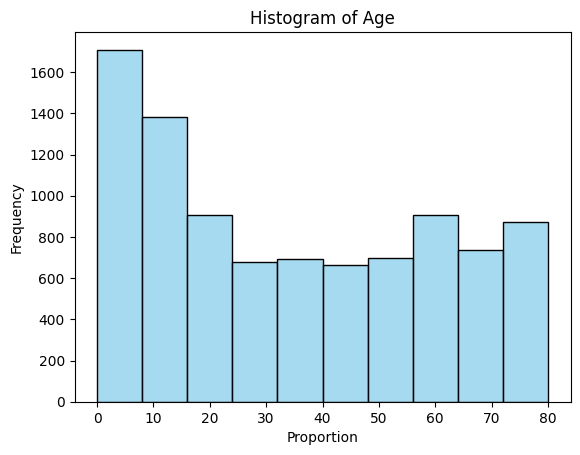

In [68]:
# distribution of age
sns.histplot(dem_us_sel['AgeGroup'], bins=10, kde=False, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Proportion')
plt.ylabel('Frequency')
plt.show()

Higher bar at left and towards right indicate. US pipulation consists of larger proportion of younger people and larger proportion of aoder people.

In [69]:
# proportion of categories of Sex
get_prop(dem_us_sel, 'Sex')

,Sex,Proportion
0,2.0,0.507564
1,1.0,0.492436


In [70]:
# replacing 0 and 1 by male and female
def_dict = {1: "male", 2: "female"}
dem_us_sel['Sex'] = dem_us_sel['Sex'].replace(def_dict)
print(dem_us_sel['Sex'].head())

0    female
1      male
2    female
3      male
4      male
Name: Sex, dtype: object


In [71]:
# mean and standard deviation of age for different sex category
dem_us_sel.groupby('Sex')['AgeGroup'].agg(['mean','std'])

,mean,std
Sex,,
female,34.545455,25.253184
male,34.116524,25.753445


In [72]:
# now lets categorise the US demographic data as
# per the age group available in the alcohol consumption group
# bins of age category
age_bins = [-1, 19, 34, 49, 64, 150]
age_labels = ['0-19', '20-34', '35-49', '50-64', '65+']
dem_us_sel['AgeGroup'] = pd.cut(dem_us_sel['AgeGroup'], bins=age_bins, labels=age_labels, right=False)
dem_us_sel.head()

,Sex,AgeGroup
0,female,0-19
1,male,0-19
2,female,65+
3,male,0-19
4,male,0-19


In [73]:
def get_demo_prop(df, col):
    """(pd.dataframe, str)->None
    This function takes a dataframe and a column name. Then it prints the
    proportion of unique values in that column.

    >>> p = pd.DataFrame({'var1':['A','B','C','A','B','A']})

    >>> get_prop(p,'var1')
        var1  Proportion
    0    A    0.500000
    1    B    0.333333
    2    C    0.166667
    """
    prop = df[col].value_counts(normalize=True).reset_index()
    prop.columns = [col, 'Demographic Proportion']
    return prop

In [74]:
# lets get the demographic proportion of age group
us_dem_age_prop = get_demo_prop(dem_us_sel,'AgeGroup')
us_dem_age_prop

,AgeGroup,Demographic Proportion
0,0-19,0.382753
1,65+,0.174195
2,50-64,0.164686
3,20-34,0.143830
4,35-49,0.134536


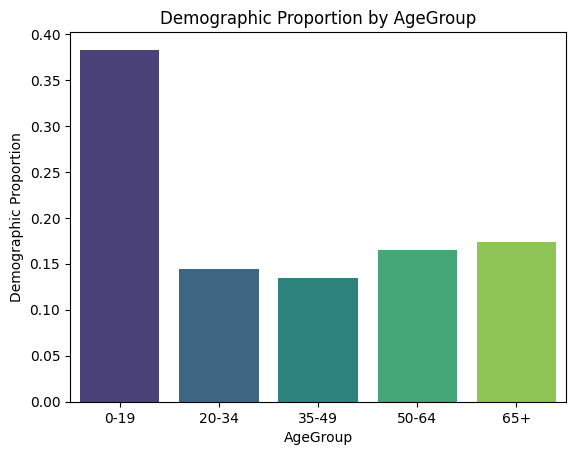

In [75]:
# bar plot of the age group demographic
sns.barplot(x='AgeGroup', y='Demographic Proportion', data=us_dem_age_prop, palette='viridis')
plt.title('Demographic Proportion by AgeGroup')
plt.xlabel('AgeGroup')
plt.ylabel('Demographic Proportion')
plt.show()

We see among US population there were 0.3827 were in age group 0-19, 0.1438 were in age group 20-34, 0.134 in age group 35-49, 0.1646 in 50-64 age group and 0.174 in age group 65+ according to Nhanes 2017-18 survey.

In [76]:
# lets get the demographic proportion of sex
us_dem_sex_prop = get_demo_prop(dem_us_sel,'Sex')
us_dem_sex_prop

,Sex,Demographic Proportion
0,female,0.507564
1,male,0.492436


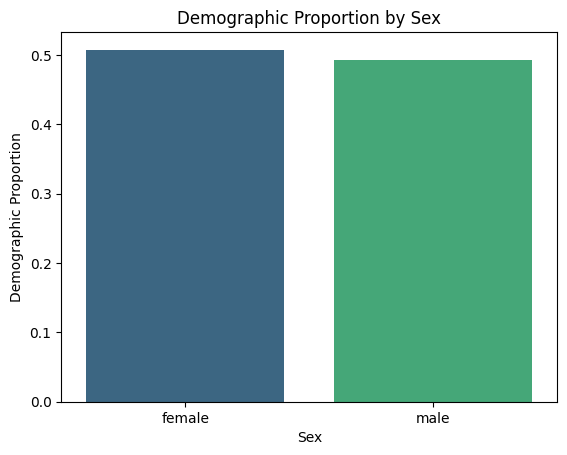

In [77]:
# bar plot of the sex demographic
sns.barplot(x='Sex', y='Demographic Proportion', data=us_dem_sex_prop, palette='viridis')
plt.title('Demographic Proportion by Sex')
plt.xlabel('Sex')
plt.ylabel('Demographic Proportion')
plt.show()

We see among US population there were 0.5075 females and 0.4924 males according to Nhanes 2017-18 survey.

# Data Join/Data Merge

Lets merge the age-category summarised data to age proportion demography data

In [78]:
# lets merge the age category data with age and demography data
merged_df_age_cat = pd.merge(grp_age_cat, us_dem_age_prop, on='AgeGroup', how='left')
merged_df_age_cat.head(10)

,AgeGroup,Category,Data_Value,Demographic Proportion
0,0-19,100% Alcohol-Attributable,890,0.382753
1,0-19,Alcohol-Related Poisonings,56926,0.382753
2,0-19,Cancer,0,0.382753
3,0-19,Coronary heart disease,0,0.382753
4,0-19,Heart Disease and Stroke,0,0.382753
5,0-19,"Liver, Gallbladder, and Pancreas",0,0.382753
6,0-19,Motor Vehicle Traffic Crashes,154062,0.382753
7,0-19,Other Acute Causes,280874,0.382753
8,0-19,Other Chronic Causes,30498,0.382753
9,0-19,Suicide,130388,0.382753


Lets merge the age-cause of death summarised data to age proportion demography data

In [79]:
# lets merge the age cause of death data with age and demography data
merged_df_age_cd = pd.merge(grp_age_cd, us_dem_age_prop, on='AgeGroup', how='left')
merged_df_age_cd.head(10)

,AgeGroup,Cause_of_Death,Data_Value,Demographic Proportion
0,0-19,Air-space transport,416,0.382753
1,0-19,Alcohol abuse,0,0.382753
2,0-19,Alcohol cardiomyopathy,0,0.382753
3,0-19,Alcohol dependence syndrome,0,0.382753
4,0-19,Alcohol poisoning,7128,0.382753
5,0-19,Alcohol polyneuropathy,0,0.382753
6,0-19,Alcohol-induced acute pancreatitis,0,0.382753
7,0-19,Alcohol-induced chronic pancreatitis,0,0.382753
8,0-19,Alcoholic gastritis,0,0.382753
9,0-19,Alcoholic liver disease,0,0.382753


Lets merge the sex-category summarised data to sex proportion demography data

In [80]:
# In demographic data Sex have small values
# so lets make Sex categories in alcohol deaths data as small as well
grp_sex_cat['Sex']=grp_sex_cat['Sex'].str.lower()

# lets merge the sex category data with sex and demography data
merged_df_sex_cat = pd.merge(grp_sex_cat, us_dem_sex_prop, on='Sex', how='left')
merged_df_sex_cat.head(10)

,Sex,Category,Data_Value,Demographic Proportion
0,female,100% Alcohol-Attributable,1094816,0.507564
1,female,Alcohol-Related Poisonings,980449,0.507564
2,female,Cancer,283011,0.507564
3,female,Coronary heart disease,-55943,0.507564
4,female,Heart Disease and Stroke,339977,0.507564
5,female,"Liver, Gallbladder, and Pancreas",368444,0.507564
6,female,Motor Vehicle Traffic Crashes,371983,0.507564
7,female,Other Acute Causes,506512,0.507564
8,female,Other Chronic Causes,43757,0.507564
9,female,Suicide,379278,0.507564


Lets merge the sex-cause of death summarised data to sex proportion demography data

In [81]:
# In demographic data Sex have small values
# so lets make Sex categories in alcohol deaths data as small as well
grp_sex_cd['Sex']=grp_sex_cd['Sex'].str.lower()

# lets merge the age category data with age and demography data
merged_df_sex_cd = pd.merge(grp_sex_cd, us_dem_sex_prop, on='Sex', how='left')
merged_df_sex_cd

,Sex,Cause_of_Death,Data_Value,Demographic Proportion
0,female,Air-space transport,1608,0.507564
1,female,Alcohol abuse,105527,0.507564
2,female,Alcohol cardiomyopathy,9308,0.507564
3,female,Alcohol dependence syndrome,147347,0.507564
4,female,Alcohol poisoning,83953,0.507564
...,...,...,...,...
111,male,"Stroke, ischemic",18574,0.492436
112,male,Suicide,1194222,0.492436
113,male,Suicide by and exposure to alcohol,3117,0.492436
114,male,"Unprovoked seizures, epilepsy, or seizure diso...",42350,0.492436


# Demographic under alcohol consumption related risk

## Functions to generate risk report

Function to get demography of choice

In [82]:
# function to get demographic data from the user
def get_demography():
    """
    This function takes no argument. When it called it asks user for demographic information.
    """
    demographic_choice = input("Select the demographic:\n1. Age Group\n2. Sex\n: ").lower()

    if demographic_choice == '1':
        return 'AgeGroup'
    elif demographic_choice == '2':
        return 'Sex'
    else:
        print("Invalid choice.")
        return None

Lets similarly create a function to ask the user for risk factor

In [83]:
# function to get the risk factor data from the user
def get_risk_factor():
    """
    This function takes no argument. When it called it asks user for risk factor information.
    """
    risk_factor_choice = input("Select the risk factor to explore:\n1. Category of Risk\n2. Cause of Death\n: ").lower()

    if risk_factor_choice == '1':
        risk_fact= 'Category'
        risk_val = input("Enter category: ").lower()
    elif risk_factor_choice == '2':
        risk_fact= 'Cause_of_Death'
        risk_val = input("Enter Cause of death: ").lower()
    else:
        print("Invalid choice.")
        return None
    return risk_fact, risk_val

In [84]:
# function to select the correct data set
def get_data(merged_df_age_cat, merged_df_age_cd, merged_df_sex_cat, merged_df_sex_cd,demographic,risk_factor ):
    """
    This function takes all the four demographic and risk factor combination data and returns the matching data frame
    as per the demographic and risk factor data.
    """
    if demographic == 'AgeGroup' and risk_factor == 'Category':
        return merged_df_age_cat
    elif demographic == 'AgeGroup' and risk_factor == 'Cause_of_Death':
        return merged_df_age_cd
    elif demographic == 'sex' and risk_factor == 'Category':
        return merged_df_sex_cat
    else:
        return merged_df_sex_cd

In [85]:
# function to generate table report for given risk factor
def get_report(merged_df_age_cat, merged_df_age_cd, merged_df_sex_cat, merged_df_sex_cd):
    """
    This function takes four data frame. Data frame are combination of demographic category and risk factor.
    """
    # calling functions to get demographic input and risk factor input
    demographic=get_demography()
    risk_factor, risk_val = get_risk_factor()
    df = get_data(merged_df_age_cat, merged_df_age_cd, merged_df_sex_cat, merged_df_sex_cd,demographic,risk_factor)
    # filtering data for risk factor value
    df = df[df[risk_factor].str.lower()==risk_val]
    print(f"For demographic {demographic} and risk factor {risk_factor}({risk_val}) demographic under risk report is as below:\n")
    print(df)

In [87]:
# calling the function

# possible values of risk category can be obtained from above category

# eg. ['100% Alcohol-Attributable', 'Alcohol-Related Poisonings',
#       'Cancer', 'Coronary heart disease', 'Heart Disease and Stroke',
#       'Liver, Gallbladder, and Pancreas',
#       'Motor Vehicle Traffic Crashes', 'Other Acute Causes',
 #      'Other Chronic Causes', 'Suicide']

# possible values of risk category can be obtained from above Cause of Death
"""
['Air-space transport', 'Alcohol abuse', 'Alcohol cardiomyopathy',
       'Alcohol dependence syndrome', 'Alcohol poisoning',
       'Alcohol polyneuropathy', 'Alcohol-induced acute pancreatitis',
       'Alcohol-induced chronic pancreatitis', 'Alcoholic gastritis',
       'Alcoholic liver disease', 'Alcoholic myopathy',
       'Alcoholic psychosis', 'Aspiration', 'Atrial fibrillation',
       'Cancer, breast (females only)', 'Cancer, colorectal',
       'Cancer, esophageal', 'Cancer, laryngeal', 'Cancer, liver',
       'Cancer, oral cavity and pharyngeal', 'Cancer, pancreatic',
       'Cancer, prostate (males only)', 'Cancer, stomach',
       'Child maltreatment', 'Chronic hepatitis',
       'Coronary heart disease',
       'Degeneration of nervous system due to alcohol', 'Drowning',
       'Esophageal varices', 'Fall injuries', 'Fetal alcohol syndrome',
       'Fetus and newborn affected by maternal use of alcohol',
       'Fire injuries', 'Firearm injuries', 'Gallbladder disease',
       'Gastroesophageal hemorrhage', 'Homicide', 'Hypertension',
       'Hypothermia', 'Infant death, low birth weight',
       'Infant death, preterm birth',
       'Infant death, small for gestational age',
       'Liver cirrhosis, unspecified', 'Motor vehicle nontraffic crashes',
       'Motor vehicle traffic crashes',
       'Occupational and machine injuries', 'Other road vehicle crashes',
       'Pancreatitis, acute', 'Pancreatitis, chronic', 'Pneumonia',
       'Poisoning (not alcohol)', 'Portal hypertension',
       'Stroke, hemorrhagic', 'Stroke, ischemic', 'Suicide',
       'Suicide by and exposure to alcohol',
       'Unprovoked seizures, epilepsy, or seizure disorder',
       'Water transport']
"""

get_report(merged_df_age_cat, merged_df_age_cd, merged_df_sex_cat, merged_df_sex_cd)

Select the demographic:
1. Age Group
2. Sex
: Sex
Invalid choice.
Select the risk factor to explore:
1. Category of Risk
2. Cause of Death
: 2
Enter Cause of death: Cause of Death
For demographic None and risk factor Cause_of_Death(cause of death) demographic under risk report is as below:

Empty DataFrame
Columns: [Sex, Cause_of_Death, Data_Value, Demographic Proportion]
Index: []


- The output shows the US population by age group subject risk if they take excessive or normal alcohol drinks.
- Data value is the number of deaths in US in 2015 to 2019 due to Homicide which was somehow related to alcohol consumption and the population exposed to that are 0.38.
- Most number of Homicide was reported in 20-34 age group and the population exposed to that ia 14%.

## summary based on the project and analysis.

In this project, I analyzed alcohol-related death data in order to categorize risk factors and causes of death across U.S. demographic groups from 2015-2019. The data sources were the HealthData.gov ARDI dataset and NHANES demographics data. Key analysis insights include:
The output categorizes the U.S. population by age group and estimates their risk exposure based on excessive or normal alcohol consumption levels.
The "Data_value" represents the number of alcohol-attributable homicide deaths in the U.S. from 2015-2019. 0.38% of the total population was exposed to this homicide risk factor.
The 20-34 age group saw the highest number of alcohol-related homicide deaths over the period, with an estimated 14% of that population exposed to risk.
This analysis serves as an example methodology for assessing hazard risk categories and demographic exposures, which could be applied to other public health areas like drug-related mortality or industry safety incident data.